# Basic Usage of [Gym](https://gym.openai.com/) from OpenAI

In [1]:
import gym
from gym import envs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print ("gym:[%s]"%(gym.__version__))
print ("numpy:[%s]"%(np.__version__))
print ("matplotlib:[%s]"%(matplotlib.__version__))

gym:[0.18.0]
numpy:[1.20.1]
matplotlib:[3.3.4]


### Discrete environment (FrozenLake 8x8)

##### Initialize 

In [2]:
env = gym.make('FrozenLake8x8-v0')
print ("[%s] initialized."%(env.unwrapped.spec.id))

[FrozenLake8x8-v0] initialized.


##### Render 
```
SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)
```

In [3]:
env = gym.make('FrozenLake8x8-v0')
env.reset()
env.render(mode='human')


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


##### State and action space

In [4]:
obs_space = env.observation_space
n_state = obs_space.n
action_space = env.action_space
n_action = action_space.n
print("Observation space:[%d]"%(n_state))
print("Action space:[%d]"%(n_action))

Observation space:[64]
Action space:[4]


##### Loop 

In [5]:
env.reset()
for tick in range(1000):
    print("tick:[%d]"%(tick))
    action = env.action_space.sample() # sample a random action 
    observation, reward, done, info = env.step(action) # step 
    env.render(mode = 'human') # render
    print ("")
    if done: break
env.close()

tick:[0]
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

tick:[1]
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

tick:[2]
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

tick:[3]
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

tick:[4]
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

tick:[5]
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

tick:[6]
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

tick:[7]
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

tick:[8]
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

tick:[9]
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

tick:[10]
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFF

#### Transition probability and reward

In [6]:
P = env.unwrapped.P 
for s in P.keys(): # for all states
    for a in P[s].keys(): # for all actions
        for (prob,s_prime,rwd,_) in P[s][a]:
            print ("P(s':%02d|s:%02d,a:%02d)=%.2f, Reward=%.2f"%
                   (s_prime,s,a,prob,rwd))

P(s':00|s:00,a:00)=0.33, Reward=0.00
P(s':00|s:00,a:00)=0.33, Reward=0.00
P(s':08|s:00,a:00)=0.33, Reward=0.00
P(s':00|s:00,a:01)=0.33, Reward=0.00
P(s':08|s:00,a:01)=0.33, Reward=0.00
P(s':01|s:00,a:01)=0.33, Reward=0.00
P(s':08|s:00,a:02)=0.33, Reward=0.00
P(s':01|s:00,a:02)=0.33, Reward=0.00
P(s':00|s:00,a:02)=0.33, Reward=0.00
P(s':01|s:00,a:03)=0.33, Reward=0.00
P(s':00|s:00,a:03)=0.33, Reward=0.00
P(s':00|s:00,a:03)=0.33, Reward=0.00
P(s':01|s:01,a:00)=0.33, Reward=0.00
P(s':00|s:01,a:00)=0.33, Reward=0.00
P(s':09|s:01,a:00)=0.33, Reward=0.00
P(s':00|s:01,a:01)=0.33, Reward=0.00
P(s':09|s:01,a:01)=0.33, Reward=0.00
P(s':02|s:01,a:01)=0.33, Reward=0.00
P(s':09|s:01,a:02)=0.33, Reward=0.00
P(s':02|s:01,a:02)=0.33, Reward=0.00
P(s':01|s:01,a:02)=0.33, Reward=0.00
P(s':02|s:01,a:03)=0.33, Reward=0.00
P(s':01|s:01,a:03)=0.33, Reward=0.00
P(s':00|s:01,a:03)=0.33, Reward=0.00
P(s':02|s:02,a:00)=0.33, Reward=0.00
P(s':01|s:02,a:00)=0.33, Reward=0.00
P(s':10|s:02,a:00)=0.33, Reward=0.00
P

### Continuous environment (CartPole)

##### Initialize 

In [7]:
env = gym.make('CartPole-v1')
env.reset()
print ("[%s] initialized."%(env.unwrapped.spec.id))

[CartPole-v1] initialized.


##### Render

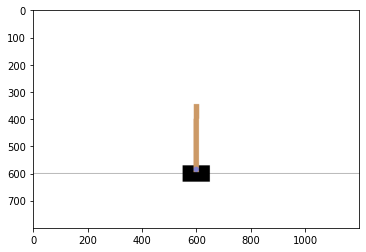

In [8]:
%matplotlib inline
env = gym.make('CartPole-v1')
env.reset()
frame = env.render(mode='rgb_array')
plt.imshow(frame) 
env.close()

##### State and action space

In [9]:
np.set_printoptions(precision=3) # set print options
obs_space = env.observation_space
action_space = env.action_space
n_action = action_space.n
print("Observation space:%s"%(obs_space.shape,))
print("   low:%s"%(obs_space.low,))
print("  high:%s"%(obs_space.high,))
print("Action space:[%d]"%(n_action))

Observation space:(4,)
   low:[-4.800e+00 -3.403e+38 -4.189e-01 -3.403e+38]
  high:[4.800e+00 3.403e+38 4.189e-01 3.403e+38]
Action space:[2]


##### Make a gif 

In [10]:
from matplotlib import animation
from IPython.display import display, HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_jshtml())
def display_frames_as_gif(frames):
    patch = plt.imshow(frames[0])
    plt.axis('off')
    def animate(i):
        patch.set_data(frames[i])
    anim = animation.FuncAnimation(
        plt.gcf(),animate,frames=len(frames),interval=10)
    display(display_animation(anim))
    
# Loop
env = gym.make('CartPole-v1')
env.reset()
frames = []
for t in range(10000):
    frames.append(env.render(mode='rgb_array'))
    action = action_space.sample() # random action
    obs, reward, done, info = env.step(action) # step 
    if done: break
env.close()
print ("[%d] frames."%(len(frames)))
display_frames_as_gif(frames)

[11] frames.
